In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from parallel_run import *
from utils import *

PATH = Path('../data')
filename = PATH/'DHTMY_SAM_E_0KGKSU.csv'
meta, tmy_data = read_tmy(filename,  coerce_year=2018)

In [4]:
meta

{'Source': 'ExpSolar',
 'Location ID': '00000',
 'City': 'S1',
 'State': 'NA',
 'Country': 'Chile',
 'Latitude': -22.1689,
 'Longitude': -69.4219,
 'Time Zone': -4,
 'Elevation': 1163.0}

In [5]:
tmy_data.head(10)

,ghi,dni,dhi,temp_air,temp_dew,humidity,air_pressure,wind_speed,wind_dir,snow
datetime,,,,,,,,,,
2018-01-01 00:00:00-04:00,0.0,0.0,0.0,16.7,16.7,81.2,884.9,2.9,2.3,0
2018-01-01 01:00:00-04:00,0.0,0.0,0.0,16.1,16.1,77.0,885.0,1.9,22.3,0
2018-01-01 02:00:00-04:00,0.0,0.0,0.0,15.0,15.0,75.6,885.1,1.4,31.8,0
2018-01-01 03:00:00-04:00,0.0,0.0,0.0,14.7,14.7,74.7,885.1,0.3,38.9,0
2018-01-01 04:00:00-04:00,0.0,0.0,0.0,13.6,13.6,76.6,885.1,1.1,43.2,0
2018-01-01 05:00:00-04:00,0.0,0.0,0.0,12.7,12.7,81.1,885.1,1.4,47.3,0
2018-01-01 06:00:00-04:00,0.0,0.0,0.0,11.5,11.5,79.3,885.1,1.0,213.1,0
2018-01-01 07:00:00-04:00,187.0,711.7,32.5,12.7,12.7,59.6,885.1,0.4,220.3,0
2018-01-01 08:00:00-04:00,433.5,900.9,42.0,17.1,17.1,42.9,884.8,1.4,232.9,0


In [6]:
pvarray_parameters = system_def(albedo=0.3, module_size=(1.976, 0.99), 
                                h_ground=1.8, tracking=True, axis_azimuth=0, 
                                n_pvrows=3, gcr=0.3);pvarray_parameters

{'n_pvrows': 3,
 'pvrow_height': 1.8,
 'pvrow_width': 1.98,
 'tracking': True,
 'axis_azimuth': 0,
 'surface_tilt': 38,
 'surface_azimuth': 180,
 'albedo': 0.3,
 'gcr': 0.3,
 'rho_front_pvrow': 0.075,
 'rho_back_pvrow': 0.075,
 'cut': {0: {'front': 3, 'back': 6},
  1: {'front': 3, 'back': 6},
  2: {'front': 3, 'back': 6}}}

In [7]:
data = get_data(filename, pvarray_parameters, reader='tmy')

INFO:parallel_run:Correcting 117 indexes, Total GHI discarded = 578.0000000000001
C:\Users\tc256760\AppData\Local\Continuum\miniconda3\envs\pvfactors\lib\site-packages\pvlib\tracking.py:449: RuntimeWarning: invalid value encountered in arccos
  wc = np.degrees(np.arccos(temp))
C:\Users\tc256760\AppData\Local\Continuum\miniconda3\envs\pvfactors\lib\site-packages\pvlib\tracking.py:473: RuntimeWarning: invalid value encountered in arccos
  aoi = np.degrees(np.arccos(np.abs(np.sum(sun_vec*panel_norm, axis=0))))
C:\Users\tc256760\AppData\Local\Continuum\miniconda3\envs\pvfactors\lib\site-packages\pvlib\tracking.py:568: RuntimeWarning: invalid value encountered in remainder
  surface_azimuth = surface_azimuth % 360
C:\Users\tc256760\AppData\Local\Continuum\miniconda3\envs\pvfactors\lib\site-packages\pvlib\tracking.py:572: RuntimeWarning: invalid value encountered in arccos
  surface_tilt = 90 - np.degrees(np.arccos(dotproduct))


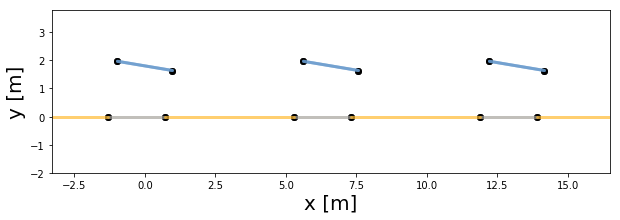

In [8]:
debug_pvarray(data, pvarray_parameters, 12)

In [9]:
res = pv_engine_run(data, pvarray_parameters, parallel=6)

INFO:pvfactors.run:Parallel calculation elapsed time: 82.74208736419678 sec


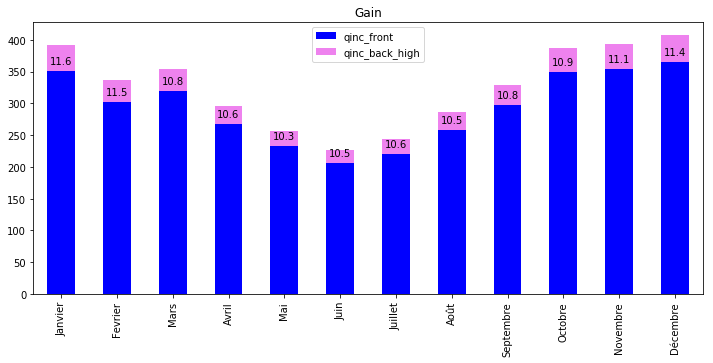

In [11]:
plot_gain(res.qinc_front, res.qinc_back_high)

In [12]:
(res.qinc_front.sum()+res.qinc_back_high.sum())/1e6

3.9061306635560227